In [107]:
# installation: 
! pip install lyricsgenius
! pip install pandas
! pip install regex
! pip install matplotlib
! pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [106]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer

ModuleNotFoundError: No module named 'keras'

In [72]:
# file paths
root = '/'
kaggleDataset = root + 'datasets/kaggleData/'
geniusDataset = root + 'datasets/geniusClean/'


In [76]:
# make a function out of the above code with the file path as input
def createDfFromFiles(path):
    # make the path from current directory and the input path
    pathComp = os.getcwd() + path

    # create a tuple from files in kaggle dataset with the file name and the file content, with latin-1 encoding
    files = [(file, open(pathComp + file, 'r', encoding='latin-1').read()) for file in os.listdir(pathComp)]

    # delete all .txt from filename
    files = [(file.replace('.txt', ''), content) for file, content in files]

    # delete all Lyrics_ from filename
    files = [(file.replace('Lyrics_', ''), content) for file, content in files]

    # replace all \n with space
    files = [(file, content.replace('\n', ' ')) for file, content in files]

    # replace all double spaces with single space
    files = [(file, content.replace('  ', ' ')) for file, content in files]

    # delete all spaces at the beginning of the string
    files = [(file, content.lstrip()) for file, content in files]

    # create a dataframe from the tuple
    df = pd.DataFrame(files, columns=['artist', 'lyrics'])

    return df

kaggle_df = createDfFromFiles(kaggleDataset)
genius_df = createDfFromFiles(geniusDataset)

In [82]:
# add number of words to the dataframe
kaggle_df['num_words'] = kaggle_df['lyrics'].apply(lambda x: len(x.split()))
genius_df['num_words'] = genius_df['lyrics'].apply(lambda x: len(x.split()))

In [83]:
print(kaggle_df.shape)
kaggle_df.head()


(50, 3)


,artist,lyrics,num_words
0,prince,"All of this and more is for you With love, sin...",62774
1,dickinson,"I. LIFE. I. SUCCESS. [Published in ""A Masque...",29948
2,notorious-big,ï»¿baby It was all a dream I used to read Word...,46234
3,beatles,"Yesterday, all my troubles seemed so far away ...",14340
4,bob-dylan,"âThere must be some way out of here,â said...",38203


In [84]:
print(genius_df.shape)
genius_df.head()

(48, 3)


,artist,lyrics,num_words
0,Juanfran,Como Llora Lyrics La Movie baby La vi cuando...,3504
1,JoséFeliciano,Feliz Navidad Lyrics Feliz Navidad Feliz Navi...,3524
2,JBalvinMaríaBecerra,TranslationsDeutschQu Ms Pues Lyrics Qu ms pu...,496
3,PASHANIM,Shababs botten Lyrics Ey KKKingsnake Ey Pasha...,5719
4,TINIMaríaBecerra,Minteme Lyrics Ay me ests grabando ya s Te de...,772


In [87]:
kaggle_df['num_words'].describe()

count       50.000000
mean     26954.440000
std      14842.299298
min         21.000000
25%      16234.250000
50%      22446.000000
75%      37431.750000
max      64483.000000
Name: num_words, dtype: float64

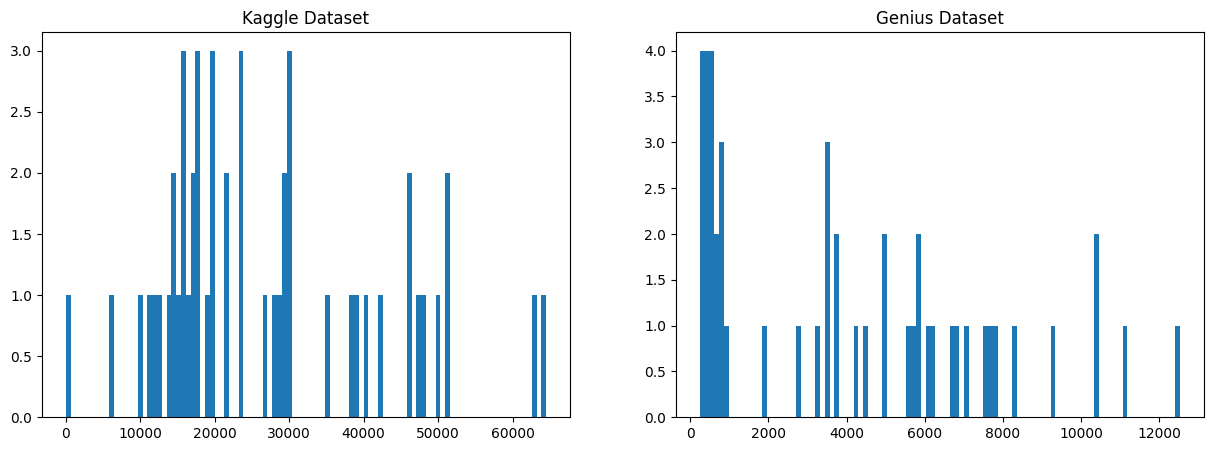

In [93]:
# plot frequency distribution of number of words for genius_df and kaggle_df dataset in seperate plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(kaggle_df['num_words'], bins=100)
ax[0].set_title('Kaggle Dataset')
ax[1].hist(genius_df['num_words'], bins=100)
ax[1].set_title('Genius Dataset')
plt.show()


In [95]:
# get 10 most used words in lyrics from df
def getMostUsedWords(df, n):
    # get all words from lyrics
    words = ' '.join(df['lyrics']).split()

    # create a dictionary with the words as keys and the number of times it appears as value
    wordsDict = {word: words.count(word) for word in words}

    # sort the dictionary by the values
    wordsDict = {k: v for k, v in sorted(wordsDict.items(), key=lambda item: item[1], reverse=True)}

    # get the first n words from the dictionary
    words = list(wordsDict.keys())[:n]

    # get the first n values from the dictionary
    values = list(wordsDict.values())[:n]

    # return the words and values
    return words, values




In [102]:
#kaggle_mostUsedWords = getMostUsedWords(kaggle_df, 30)
#genius_mostUsedWords = getMostUsedWords(genius_df, 30)

#print(kaggle_mostUsedWords)
#print(genius_mostUsedWords)

### Merge Lyrics Datasets

In [103]:
# merge lyrics from genius_df and kaggle_df
lyrics_df = pd.concat([kaggle_df, genius_df], ignore_index=True)
lyrics_df.head()

,artist,lyrics,num_words
0,prince,"All of this and more is for you With love, sin...",62774
1,dickinson,"I. LIFE. I. SUCCESS. [Published in ""A Masque...",29948
2,notorious-big,ï»¿baby It was all a dream I used to read Word...,46234
3,beatles,"Yesterday, all my troubles seemed so far away ...",14340
4,bob-dylan,"âThere must be some way out of here,â said...",38203


In [104]:
lyrics_df.describe()

,num_words
count,98.000000
mean,15741.397959
std,15792.004566
min,21.000000
25%,3565.500000
50%,10765.000000
75%,22843.500000
max,64483.000000


## Tokenization

In [105]:
# define Toekeizer
kerasTokenizer = Tokenizer()

# fit the tokenizer on the lyrics
kerasTokenizer.fit_on_texts(lyrics_df['lyrics'].astype(str).str.lower())

num_words = len(kerasTokenizer.word_index) + 1
print(num_words)

t_sentences = kerasTokenizer.texts_to_sequences(lyrics_df['lyrics'].astype(str).str.lower())

print(t_sentences[0])

NameError: name 'Tokenizer' is not defined

In [108]:
# sequence into n-grams
input_seq = list()

for i in t_sentences:
    for j in range(1, len(i)):
        n_gram_sequence = i[:j+1]
        input_seq.append(n_gram_sequence)